st122645

https://github.com/desoe/DSAIpython

# === Task ===
1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play start
iris = datasets.load_iris()
X = iris.data[:, 2:]  # only take the first two features.
y = iris.target       # not yet encoded

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [24]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

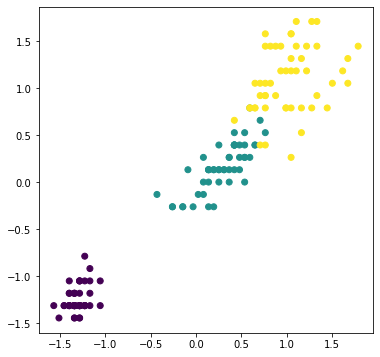

In [25]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [26]:
# Step 2: Fit your data


class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)  # W matrics
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.1 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            starting_time = time.time()
            batch_size = 1
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - starting_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 1.9430262697375922
Loss at iteration 500 0.15994958700199127
Loss at iteration 1000 0.1131596737388314
Loss at iteration 1500 0.09472897074063731
Loss at iteration 2000 0.08448647910423525
Loss at iteration 2500 0.07778109932887815
Loss at iteration 3000 0.07294710386912263
Loss at iteration 3500 0.0692353218309896
Loss at iteration 4000 0.06625720395124911
Loss at iteration 4500 0.06379027193814736
Loss at iteration 5000 0.06169739960334683
Loss at iteration 5500 0.05988905179670283
Loss at iteration 6000 0.05830396538481588
Loss at iteration 6500 0.056898554539136184
Loss at iteration 7000 0.055640768161205674
Loss at iteration 7500 0.054506361651205336
Loss at iteration 8000 0.05347654478207982
Loss at iteration 8500 0.052536447223202554
Loss at iteration 9000 0.05167408741149592
Loss at iteration 9500 0.050879660971893254
time taken: 0.26607680320739746
=========Classification report=======
Report:                precision    recall  f1-score   support

        

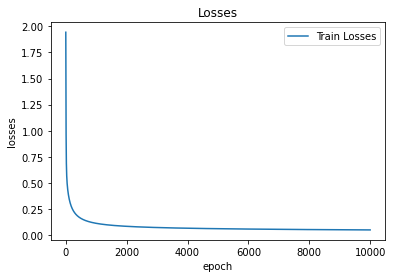

In [27]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.2616867964597003
Loss at iteration 500 0.3968919480526051
Loss at iteration 1000 0.4003457465896922
Loss at iteration 1500 0.1708222076425345
Loss at iteration 2000 0.1434062101476808
Loss at iteration 2500 0.14469451518838475
Loss at iteration 3000 0.3517084606043194
Loss at iteration 3500 0.11198369493410748
Loss at iteration 4000 0.11053403321917717
Loss at iteration 4500 0.1838449312293376
Loss at iteration 5000 0.08779276569296794
Loss at iteration 5500 0.16808582118451193
Loss at iteration 6000 0.16968629898621962
Loss at iteration 6500 0.09554041424281087
Loss at iteration 7000 0.10458095774870899
Loss at iteration 7500 0.22948263972369412
Loss at iteration 8000 0.16675776751271337
Loss at iteration 8500 0.06061005026828946
Loss at iteration 9000 0.12690855277041907
Loss at iteration 9500 0.048995408821433474
time taken: 0.23705363273620605
=========Classification report=======
Report:                precision    recall  f1-score   support

           0    

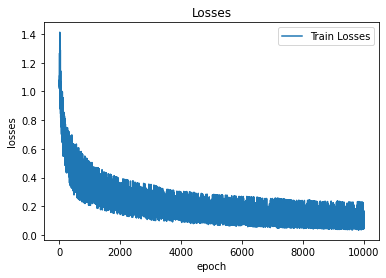

In [28]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.0041374292077945
Loss at iteration 500 1.4130716494385807
Loss at iteration 1000 0.9859717866400887
Loss at iteration 1500 0.9859717866400887
Loss at iteration 2000 1.0151855283950093
Loss at iteration 2500 1.2649340381009804
Loss at iteration 3000 0.9859717866400887
Loss at iteration 3500 0.9773372081180244
Loss at iteration 4000 1.065153414916373
Loss at iteration 4500 1.2490906592895283
Loss at iteration 5000 1.4036798668057002
Loss at iteration 5500 1.2347980198155049
Loss at iteration 6000 1.2408144099453506
Loss at iteration 6500 1.1170969372042934
Loss at iteration 7000 1.4130716494385807
Loss at iteration 7500 1.1615140192296785
Loss at iteration 8000 0.9949963304169436
Loss at iteration 8500 0.9949963304169436
Loss at iteration 9000 1.2649340381009804
Loss at iteration 9500 1.1801283234384121
time taken: 0.20804286003112793
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.00      0.

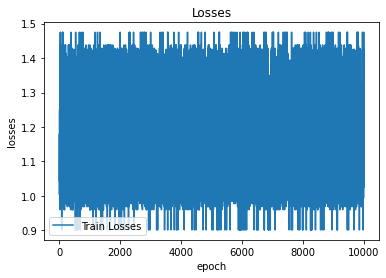

In [29]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [30]:
model = LogisticRegression(k, X_train.shape[1], "My head's gonna blow up.")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".